In [23]:
# 数据集读入
import numpy as np
from sklearn.datasets import load_iris


iris_dataset = load_iris()
print(dir(iris_dataset))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


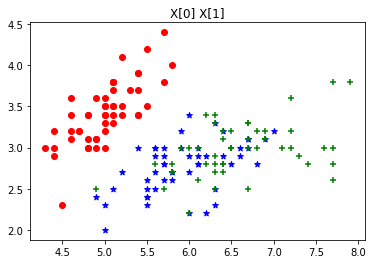

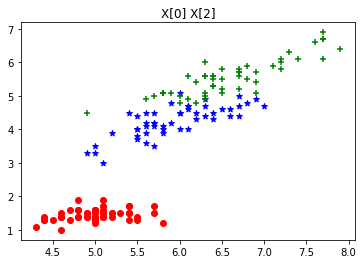

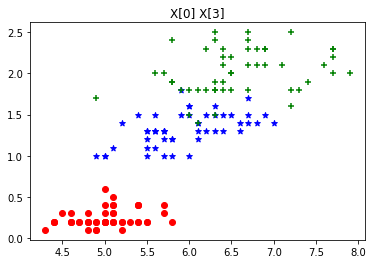

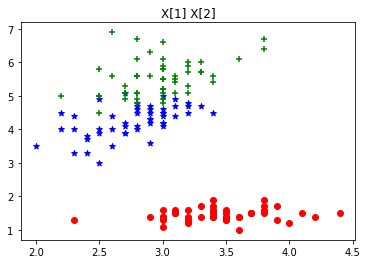

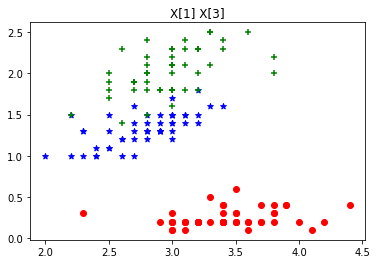

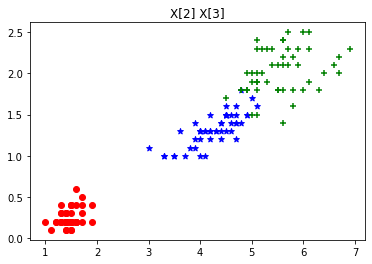

In [24]:
# 数据处理

X = iris_dataset['data']
Y = iris_dataset['target']


# 画出各参数间关系
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(4):
    for j in range(i+1,4):
        plt.figure()
        plt.title("X[%d] X[%d]"%(i,j))
        plt.scatter(X[Y==0,i],X[Y==0,j],color = 'r',marker='o')
        plt.scatter(X[Y==1,i],X[Y==1,j],color = 'b',marker='*')
        plt.scatter(X[Y==2,i],X[Y==2,j],color = 'g',marker='+')
plt.show()


In [25]:
# X选取第一列和第四列, 并对数据切分

X = X[:,0:2]

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.30)

In [26]:
# 建立SVM模型
from sklearn import svm

C=0.5
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=100000),
          svm.SVC(kernel='rbf', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(x_train, y_train) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC',
          'SVC with rbf kernel',
          'SVC with poly kernel')


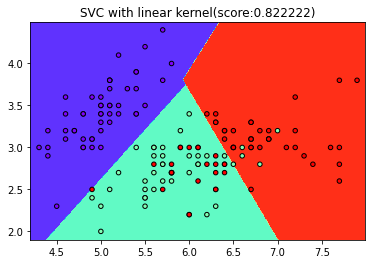

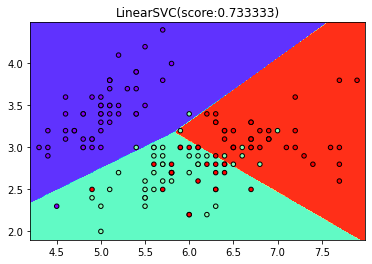

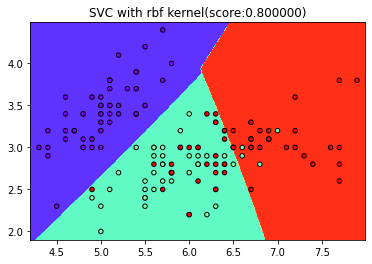

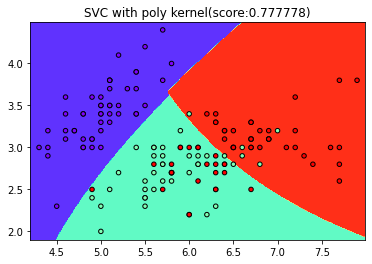

In [27]:
x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

for clf, title in zip(models, titles):
    plt.figure()
    

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow)  
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.rainbow, s=20, edgecolors='k')
    score = clf.score(x_test, y_test)
    
    plt.title(title+"(score:%f)"%score)
plt.show()
